<a href="https://colab.research.google.com/github/axiom-of-choice/recommender_system_nerds/blob/dependabot%2Fpip%2Fnumpy-1.21.0/An%C3%A1lisis_libros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargamos las librerías que nos serán útiles para revisar los datos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos los datos

df = pd.read_csv('books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
df.info() #Exploramos la forma en que se organiza nuestro df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [ ]:
df.isnull().sum() #Queremos ver la cantidad de objetos nulos en nuestra base de datos

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [ ]:
df.drop(columns=['subtitle', 'thumbnail'], inplace =  True) #Eliminamos columnas que no aportan ninguna información

In [ ]:
df.dropna(inplace=True) #Eliminamos las hileras con valores nulos

In [ ]:
df.columns #Como vemos ya no están las dos columnas que consideramos poco importantes para analizar nuestros datos

Index(['isbn13', 'isbn10', 'title', 'authors', 'categories', 'description',
       'published_year', 'average_rating', 'num_pages', 'ratings_count'],
      dtype='object')

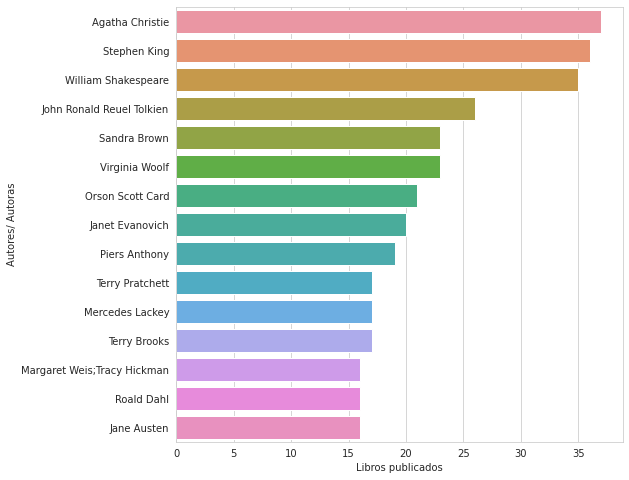

In [ ]:
#Una primera pregunta que nos podemos hacer es quiénes son los autores 
#Con más libros publicados que se encuentran registrados en la base de datos.

best_aut=df['authors'].value_counts()[0:15]

plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.barplot(data=df,x=best_aut.values,y=best_aut.index)
plt.ylabel("Autores/ Autoras")
plt.xlabel("Libros publicados")
plt.show()

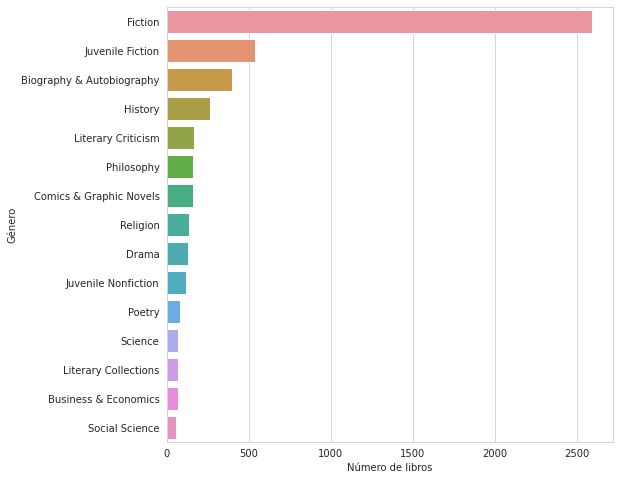

In [ ]:
#Ahora nos preguntamos cuáles son los géneros  más populares

top_gen=df['categories'].value_counts()[0:15]

plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.barplot(data=df,x=top_gen.values,y=top_gen.index)
plt.ylabel("Género")
plt.xlabel("Número de libros")
plt.show()

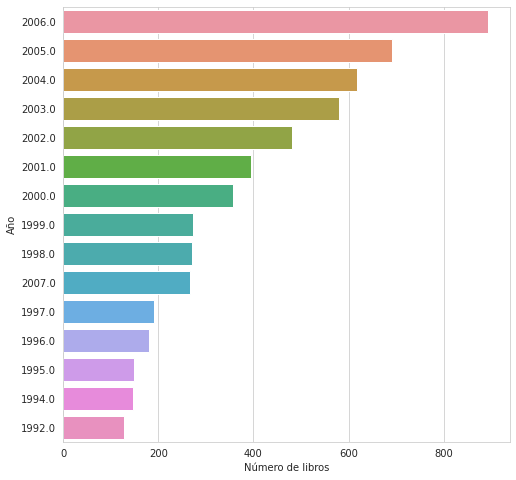

In [ ]:
#¿Qué año es el que tiene más libros publicados?

df['published_year']=df['published_year'].astype(str)
top_year=df['published_year'].value_counts()[0:15]
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')

sns.barplot(data=df,x=top_year.values,y=top_year.index)
plt.ylabel("Año")
plt.xlabel("Número de libros")
plt.show()

In [ ]:
top_high_rating_books=df.groupby(['title','average_rating'])['title'].count().to_frame()
top_high_rating_books.rename(columns={'title':'Mejores libros'},inplace=True)
top_high_rating_books.sort_values("Mejores libros",ascending=False,inplace=True)
top_high_rating_books[0:15]

,,Mejores libros
title,average_rating,
One Hundred Years of Solitude,4.06,6
The Lord of the Rings,4.49,6
The Odyssey,3.75,4
Lord of the Flies,3.67,4
A Midsummer Night's Dream,3.94,4
The Invisible Man,3.63,3
Paradise Lost,3.81,3
Dracula,3.99,3
War and Peace,4.11,3


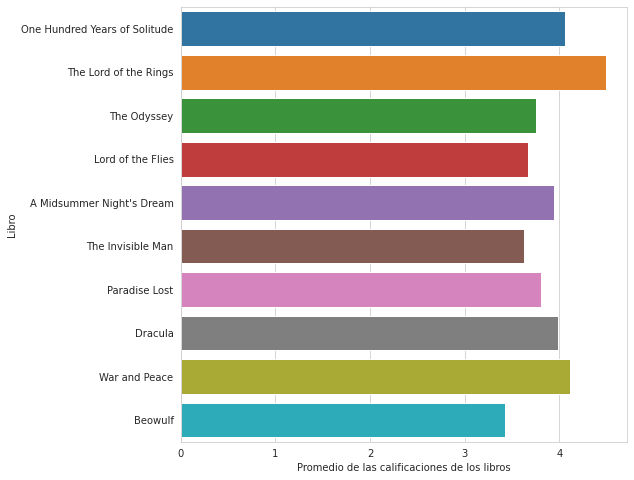

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=top_high_rating_books,x=top_high_rating_books.index.get_level_values('average_rating')[0:10],y=top_high_rating_books.index.get_level_values('title')[0:10],)
plt.ylabel("Libro")
plt.xlabel("Promedio de las calificaciones de los libros")
plt.show()